In [1]:
# Simulate the Python model

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tellurium as te

In [2]:
r = te.loadSBMLModel("./model_Korman/korman_SBML.xml") 
r.getFullStoichiometryMatrix();

In [11]:
run parsemodel.py

['atp', 'adp', 'nad', 'nadh', 'nadp', 'nadph', 'co2', 'ppi', 'pppi', 'coa', 'glc', 'g6p', 'f6p', 'fbp', 'gap', 'dhap', 'bpg', 'p3g', 'p2g', 'pep', 'pyr', 'accoa', 'acaccoa', 'hmgcoa', 'mev', 'mvp', 'mpp', 'ipp', 'dmapp', 'gpp', 'lim']
[4.0e+00 0.0e+00 2.5e-01 0.0e+00 1.5e+00 0.0e+00 0.0e+00 2.5e+01 0.0e+00
 1.5e+00 5.0e+02 0.0e+00 0.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00]
['VmaxHex', 'Keq1', 'Katp1', 'Kglc1', 'Kadp1', 'Kg6p1', 'VmaxPgi', 'Keq2', 'Kg6p2', 'Kf6p2', 'VmaxPfk', 'Keq3', 'Katp3', 'Kf6p3', 'Kadp3', 'Kfbp3', 'VmaxFba', 'Keq4', 'Kfbp4', 'Kdhap4', 'Kgap4', 'VmaxTpi', 'Keq5', 'Kdhap5', 'Kgap5', 'VmaxGap', 'Keq6', 'Kgap6', 'Knad6', 'Kppi6', 'Kbpg6', 'Knadh6', 'VmaxmGap', 'Keq7', 'Kgap7', 'Knadp7', 'Kppi7', 'Kbpg7', 'Knadph7', 'VmaxPgk', 'Keq8', 'Kbpg8', 'Kadp8', 'Kp3g8', 'Katp8', 'VmaxPgm', 'Keq9', 'Kp3g9', 'Kp2g9', 'VmaxEno', 'Keq10', 'Kp2g10', 'Kpep10', 'VmaxPyk', 'Ke

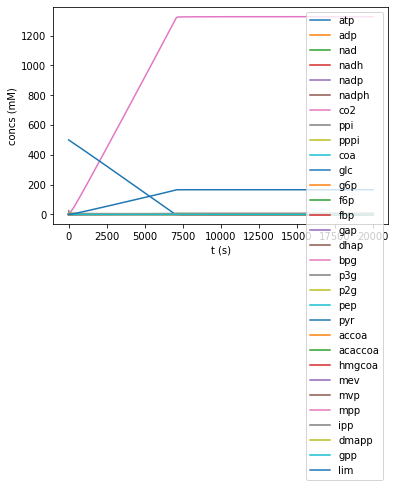

In [13]:
import model_Korman.korman as Korman
PATH_TO_OUTPUT = "./modeloutput/"
FILENAME = "korman.csv"

# Do not use dict as ordering is not guaranteed. Use list instead.
y0 = np.array(Korman.valuesVar)
params = np.array(Korman.valuesPar)
TMAX = 20000 # s
NSTEPS = 10000

time = np.linspace(0,TMAX,NSTEPS)
sol = odeint(Korman.model, y0, time, args=(params,),atol=1e-11) # Scipy solver

# Plot and save plot
for i in range(sol.shape[1]):
    plt.plot(time,sol[:,i], label=Korman.keysVar[i]);
plt.xlabel('t (s)'); plt.ylabel('concs (mM)'); plt.legend()   
#plt.savefig(PATH_TO_OUTPUT+'plot.pdf',transparent=True)
plt.show() 

# Save data
#df = pd.DataFrame(sol)
#df.to_csv(PATH_TO_OUTPUT+FILENAME, index=None)

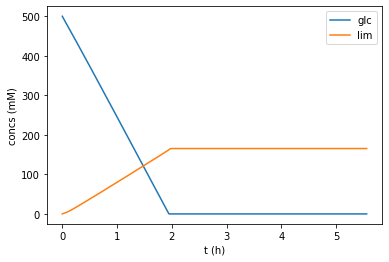

In [14]:
plt.plot(time/3600,sol[:,10], label=Korman.keysVar[10]);
plt.plot(time/3600,sol[:,30], label=Korman.keysVar[30]);
plt.xlabel('t (h)'); plt.ylabel('concs (mM)'); plt.legend()   
plt.savefig(PATH_TO_OUTPUT+'plot_GLClim.pdf',transparent=True)
plt.show() 

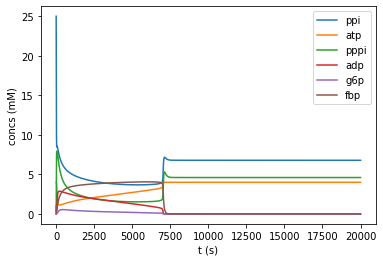

In [15]:
# Plot and save plot

sel = [7,0,8,1,11,13]
for i in sel:
    plt.plot(time,sol[:,i], label=Korman.keysVar[i]);
plt.xlabel('t (s)'); plt.ylabel('concs (mM)'); plt.legend()   
plt.savefig(PATH_TO_OUTPUT+'plotCOF.pdf',transparent=True)
plt.show() 

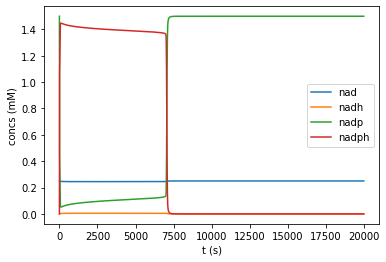

In [16]:
# Plot and save plot

sel = [2,3,4,5]
for i in sel:
    plt.plot(time,sol[:,i], label=Korman.keysVar[i]);
plt.xlabel('t (s)'); plt.ylabel('concs (mM)'); plt.legend()   
#plt.savefig(PATH_TO_OUTPUT+'plotCOF.pdf',transparent=True)
plt.show() 

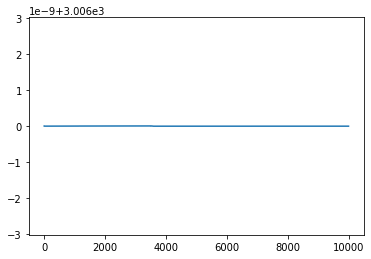

In [17]:
# conservation of mass
atp = sol[:,0]
adp = sol[:,1]
nad = sol[:,2]
nadh = sol[:,3]
nadp = sol[:,4]
nadph = sol[:,5]
co2 = sol[:,6]
ppi = sol[:,7]
pppi = sol[:,8]
coa = sol[:,9]
glc = sol[:,10]
g6p = sol[:,11]
f6p = sol[:,12]
fbp = sol[:,13]
gap = sol[:,14]
dhap = sol[:,15]
bpg = sol[:,16]
p3g = sol[:,17]
p2g = sol[:,18]
pep = sol[:,19]
pyr = sol[:,20]
accoa = sol[:,21]
acaccoa = sol[:,22]
hmgcoa = sol[:,23]
mev = sol[:,24]
mvp = sol[:,25]
mpp = sol[:,26]
ipp = sol[:,27]
dmapp = sol[:,28]
gpp = sol[:,29]
lim = sol[:,30]
    
carbon = 6*glc+6*g6p+6*f6p+6*fbp+3*dhap+3*gap+3*bpg+3*p3g+3*p2g+3*pep+3*pyr+co2+2*accoa+4*acaccoa+6*hmgcoa+6*mev+6*mvp+6*mpp+5*ipp+5*dmapp+10*gpp+10*lim
plt.plot(carbon)

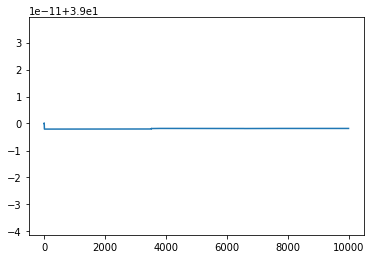

In [18]:
phosphate = 3*atp+2*adp+g6p+f6p+2*fbp+gap+dhap+2*bpg+p3g+p2g+pep+mvp+2*mpp+2*ipp+2*dmapp+2*gpp+2*pppi+ppi
plt.plot(phosphate)

* Correct stoichiometry is indicated by conservation of mass
* Multiplicative factors on stoichiometry changes rates globally
* Rate terms take into account reaction reversibility, through changes in sign
* Glycolysis requires Pi to be driven forward